## In Ubuntu/Debian : ##
**export browsing history: chrome**
```
cd ~/.config/google-chrome/Default
sqlite3 History "select datetime(last_visit_time/1000000-11644473600,'unixepoch'),url from  urls order by last_visit_time desc" > ~/chr_hist.txt
```
**export browsing history: mozilla**
```
cd .mozilla/firefox/*.default
sqlite3 places.sqlite "select datetime(last_visit_date/1000000-11644473600,'unixepoch'),url from  moz_places order by last_visit_date desc" > ~/moz_hist.txt
```
```
python3 analyze.py
```

## Requirements ##
python3-tk
sqlite3


In [1]:
%%bash
cd ~/.config/google-chrome/Default
sqlite3 History "select datetime(last_visit_time/1000000-11644473600,'unixepoch'),url from  urls order by last_visit_time desc" > ~/chr_hist.txt

In [2]:
%matplotlib inline

                   domain  count
0       www.google.com.np    169
1          localhost:8000    138
2         www.youtube.com     26
3         semantic-ui.com     24
4         docs.docker.com     20
5       stackoverflow.com     16
6              github.com     15
7   developers.google.com      9
8   react.semantic-ui.com      6
9       www.w3schools.com      6
10             khalti.com      6
11      tools.pingdom.com      5
12  developer.mozilla.org      5
13        mail.google.com      4
14        www.amadeus.com      4
15    www.webpagetest.org      4
16       en.wikipedia.org      3
17         mithril.js.org      3
18             medium.com      3
19         hackernoon.com      3


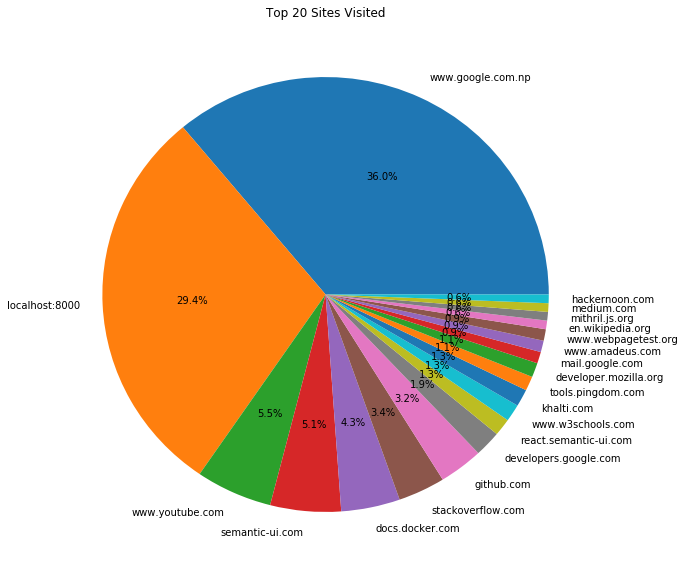

In [4]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse

import matplotlib.pyplot as plt
topN = 20

# Open our file
with open('/home/manoj/chr_hist.txt') as f:
    content = f.readlines()
# Strip whitespace then split on first occurrence of pipe character
raw_data = [line.split('|', 1) for line in [x.strip() for x in content]]
# We now have a 2D list.

data = pd.DataFrame(raw_data, columns=['datetime', 'url'])

parser = lambda u: urlparse(u).netloc
data.url = data.url.apply(parser)


# Aggregate domain entries
site_frequencies = data.url.value_counts().to_frame()
# Make the domain a column
site_frequencies.reset_index(level=0, inplace=True)
# Rename columns to appropriate names
site_frequencies.columns = ['domain', 'count']
# Display top 2
x = site_frequencies.head(topN)

print(x)

plt.figure(1, figsize=(10,10))
plt.title('Top $n Sites Visited'.replace('$n', str(topN)))
pie_data = site_frequencies['count'].head(topN).tolist()
pie_labels = None
# Uncomment to get specific domain names
pie_labels = site_frequencies['domain'].head(topN).tolist()
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_labels)
plt.show()
